## Code used to analysis Keysight digitizer

In [1]:
import glob, os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import csv

### Analysis linear range of digitizer

In [2]:
plt.imshow(np.reshape(mask*HAADFarray,(512,512)))
plt.colorbar()

NameError: name 'mask' is not defined

In [3]:
path = '/srv/home/chenyu/DEbackup/011419/LinearityTest'
# path = '/srv/home/chenyu/DEbackup/011419/LinearityTest_Contrast39.521_B_42.501_4Vrange'
path = '/srv/home/chenyu/DEbackup/012119/LinearityTest_C41.093_B39.584_4Vrange'
folder_list = os.listdir(path)
ss = np.zeros(len(folder_list))
apt = np.zeros(len(folder_list))
current = np.zeros(len(folder_list))
intensity = np.zeros(len(folder_list))

# Use spot size 9 and aprture 70 to define a region of HAADF detector, masked HAADF detector image is shown above
fullpath = path + '/SS9_APT70'
os.chdir(fullpath)
file = [image for image in os.listdir(fullpath) if 'csv' and '_Preview' in image]
file = file[0]
file=csv.reader(open(fullpath + '/' + file,'r'))
n=[]
for row in file:
    n.append(row)
        
HAADFarray = np.transpose(np.asarray(n))
HAADFarray = np.squeeze(HAADFarray)
HAADFarray = HAADFarray.astype(np.float)
print(np.amax(HAADFarray))

mask = np.heaviside(HAADFarray+0.5,1)

for ipath in range(len(folder_list)):
    fullpath = path + '/' + folder_list[ipath]
    os.chdir(fullpath)
    file = [image for image in os.listdir(fullpath) if 'csv' and '_Preview' in image]
    file = file[0]
#     print(file)
    file=csv.reader(open(fullpath + '/' + file,'r'))
    n=[]
    for row in file:
        n.append(row)
        
    HAADFarray = np.transpose(np.asarray(n))
    HAADFarray = np.squeeze(HAADFarray)
    HAADFarray = HAADFarray.astype(np.float)
    intensity[ipath] = ((HAADFarray*mask)[(HAADFarray*mask)!=0].mean())

    
    if folder_list[ipath][2:4].isdigit():
        ss[ipath] = int(folder_list[ipath][2:4])
    else:
        ss[ipath] = int(folder_list[ipath][2:3])
        
    if folder_list[ipath][-3::].isdigit():
        apt[ipath] = int(folder_list[ipath][-3::])
    elif folder_list[ipath][-2::].isdigit():
        apt[ipath] = int(folder_list[ipath][-2::])
    else:
        apt[ipath] = int(folder_list[ipath][-1::])
        
    if ss[ipath] == 9:
        current[ipath] = 1/(70*70/apt[ipath]/apt[ipath])
    elif ss[ipath] == 10:
        current[ipath] = 0.56/(70*70/apt[ipath]/apt[ipath])
    else:
        current[ipath] = 0.367/(70*70/apt[ipath]/apt[ipath])
        
    print(ss[ipath],apt[ipath],intensity[ipath],current[ipath])


1.99806716106652
11.0 30.0 -1.3227701625481743 0.06740816326530612
9.0 70.0 1.3742143449908768 1.0
9.0 5.0 -1.4944602820609243 0.00510204081632653
11.0 70.0 -0.4604796307505068 0.367
11.0 5.0 -1.4997139587684407 0.0018724489795918368
10.0 50.0 -0.711254845808941 0.28571428571428575
11.0 10.0 -1.4856515644602608 0.007489795918367347
10.0 10.0 -1.4768341255043933 0.01142857142857143
11.0 50.0 -0.9858549234485022 0.18724489795918367
10.0 5.0 -1.4981071702552673 0.0028571428571428576
10.0 100.0 1.7702045436706926 1.142857142857143
9.0 30.0 -1.012246245720459 0.18367346938775508
9.0 50.0 -0.08118903195979722 0.5102040816326531
9.0 10.0 -1.4564796274177363 0.02040816326530612
10.0 30.0 -1.2282481429620453 0.10285714285714287
10.0 70.0 0.09701808941211253 0.56
11.0 100.0 0.6727900049524002 0.7489795918367347


In [7]:
current_sort

[0.00510204081632653,
 0.02040816326530612,
 0.18367346938775508,
 0.5102040816326531,
 1.0,
 0.0028571428571428576,
 0.01142857142857143,
 0.10285714285714287,
 0.28571428571428575,
 0.56,
 1.142857142857143,
 0.0018724489795918368,
 0.007489795918367347,
 0.06740816326530612,
 0.18724489795918367,
 0.367,
 0.7489795918367347]

(-0.01, 0.03)

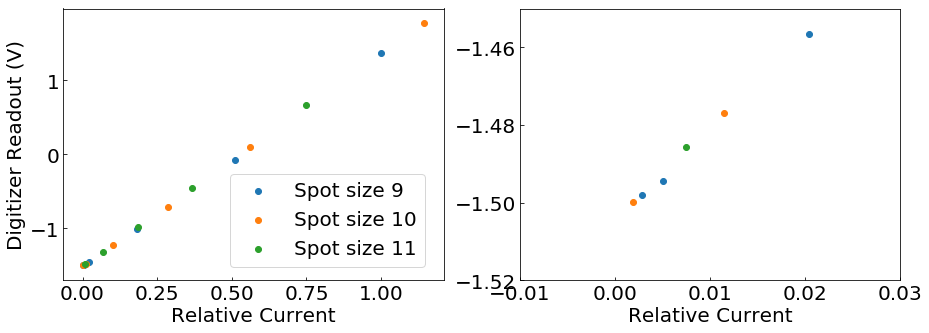

In [4]:
f, axarr = plt.subplots(1,2,figsize=(15,5))

current_sort = [x for _,x in sorted(zip(ss,current))]
apt_sort = [x for _,x in sorted(zip(ss,apt))]
intensity_sort = [x for _,x in sorted(zip(ss,intensity))]

z = np.polyfit(current_sort, intensity_sort, 1)

axarr[0].scatter(current_sort[0:6],intensity_sort[0:6],label='Spot size 9')
axarr[0].scatter(current_sort[6:12],intensity_sort[6:12],label='Spot size 10')
axarr[0].scatter(current_sort[12::],intensity_sort[12::],label='Spot size 11')

axarr[0].set_xlabel('Relative Current',fontsize=20)
axarr[0].set_ylabel('Digitizer Readout (V)',fontsize=20)
axarr[0].tick_params(labelsize=20,direction='in')
axarr[0].legend(bbox_to_anchor=(0.95, 0.05), loc='lower right', borderaxespad=0.,prop={'size': 20})

axarr[1].scatter(current_sort[0:6],intensity_sort[0:6])
axarr[1].scatter(current_sort[6:12],intensity_sort[6:12])
axarr[1].scatter(current_sort[12::],intensity_sort[12::])

axarr[1].set_xlabel('Relative Current',fontsize=20)
axarr[1].tick_params(labelsize=20,direction='in')
axarr[1].set_ylim([-1.52,-1.45])
axarr[1].set_xlim([-0.01,0.03])

In [11]:
fullpath = path + '/SS9_APT70'
os.chdir(fullpath)
file = [image for image in os.listdir(fullpath) if 'csv' and '_Preview' in image]
file = file[0]
file=csv.reader(open(fullpath + '/' + file,'r'))
n=[]
for row in file:
    n.append(row)
        
HAADFarray = np.transpose(np.asarray(n))
HAADFarray = np.squeeze(HAADFarray)
HAADFarray = HAADFarray.astype(np.float)
print(np.amax(HAADFarray))

mask = np.heaviside(HAADFarray+0.5,1)

1.99806716106652


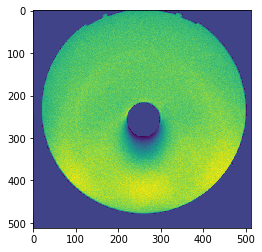

In [13]:
plt.imshow(np.reshape(mask*HAADFarray,(512,512)))

Result collected with 4V detection range shows good linearity compared to previous results collected with 16V detection range. Linear range goes all the way to 0.2% beam, which is close to the intensity level on a 4nm STO interstitial site.

## Test digitizer background noise for different detection range

In [104]:
path = '/srv/home/chenyu/DEbackup/011419/BackgroundLevel'
# folder_list = os.listdir(path)
# ss = np.zeros(len(folder_list))
# apt = np.zeros(len(folder_list))
# current = np.zeros(len(folder_list))
# intensity = np.zeros(len(folder_list))
range_list = [0.5,1,2,4,8,16]
std_list = np.zeros(len(range_list))

# Use spot size 9 and aprture 70 to define a region of HAADF detector, masked HAADF detector image is shown above

for i in range(len(range_list)):
    fullpath = path + '/'+str(range_list[i])+'V_Background'
    os.chdir(fullpath)
    file = [image for image in os.listdir(fullpath) if 'csv' and '_rawPreview' in image]
    file = file[0]
    file=csv.reader(open(fullpath + '/' + file,'r'))
    n=[]
    for row in file:
        n.append(row)

    HAADFarray = np.transpose(np.asarray(n))
    HAADFarray = np.squeeze(HAADFarray)
    HAADFarray = HAADFarray.astype(np.float)
    
    std_list[i] = np.std(HAADFarray)

Text(0, 0.5, 'Background Std (V)')

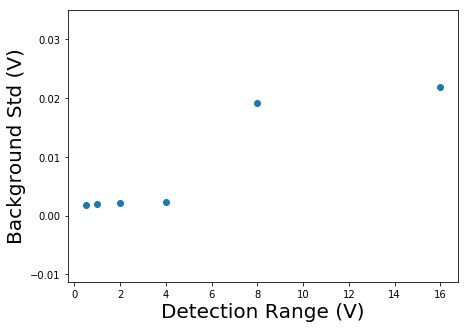

In [108]:
f, axarr = plt.subplots(figsize=(7,5))
axarr.scatter(range_list,std_list)
axarr.set_xlabel('Detection Range (V)',fontsize=20)
axarr.set_ylabel('Background Std (V)',fontsize=20)


0.0023550853297477827

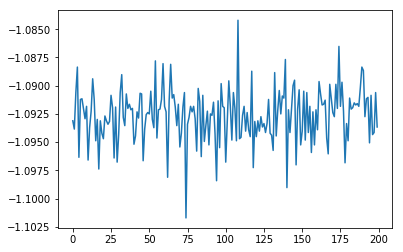

In [110]:
fullpath = path + '/4V_Background'
os.chdir(fullpath)
file = [image for image in os.listdir(fullpath) if 'csv' and '_rawPreview' in image]
file = file[0]
file=csv.reader(open(fullpath + '/' + file,'r'))
n=[]
for row in file:
    n.append(row)

HAADFarray = np.transpose(np.asarray(n))
HAADFarray = np.squeeze(HAADFarray)
HAADFarray = HAADFarray.astype(np.float)

std_list[i] = np.std(HAADFarray)

plt.plot(HAADFarray[0:200])
np.std(HAADFarray)

## Test whether digitizer has single electron sensitiviy

In [135]:
path = '/srv/home/chenyu/DEbackup/011419/SEtest/4V_Contrast_37.005_2us/'
os.chdir(path)

file = [image for image in os.listdir(path) if 'csv' and '_Preview' in image]
file = file[0]
print(file)
with open(path+'/'+file) as csvfile:
    file=csv.reader(open(path+'/'+file,'r'))
    n=[]
    for row in file:
        n.append(row)
HAADFarray = np.transpose(np.asarray(n))
HAADFarray = np.squeeze(HAADFarray)
HAADFarray = HAADFarray.astype(np.float)


HAADF_Preview_1000_1000_5_06_24_PM.csv


In [136]:
path = '/srv/home/chenyu/DEbackup/011419/SEtest/4V_Contrast_37.005_2us/'
os.chdir(path)

file = [image for image in os.listdir(path) if 'csv' and '_rawPreview' in image]
file = file[0]
print(file)
with open(path+'/'+file) as csvfile:
    file=csv.reader(open(path+'/'+file,'r'))
    n=[]
    for row in file:
        n.append(row)
HAADFarray_raw = np.transpose(np.asarray(n))
HAADFarray_raw = np.squeeze(HAADFarray_raw)
HAADFarray_raw = HAADFarray_raw.astype(np.float)
print(HAADFarray_raw.shape)

HAADF_rawPreview_1000_1000_5_06_24_PM.csv
(10500001,)


In [138]:
path = '/srv/home/chenyu/DEbackup/011419/SEtest/4V_Contrast_37.005_2us/Contast_37.005_2us_1024px.mat'
file = sio.loadmat(path)
image = file['temp']
# plt.imshow(image)
# plt.colorbar()

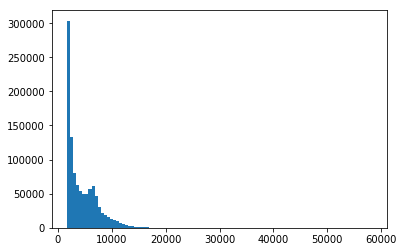

In [129]:
plt.hist(image.flatten(),bins=100)
# plt.xlim([0,20000])
plt.show()

Text(0, 0.5, 'Counts')

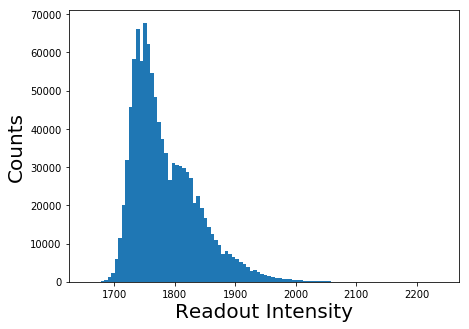

In [139]:
f, axarr = plt.subplots(figsize=(7,5))
axarr.hist(image.flatten(),bins=100)
axarr.set_xlabel('Readout Intensity',fontsize=20)
axarr.set_ylabel('Counts',fontsize=20)

Text(0, 0.5, 'Counts')

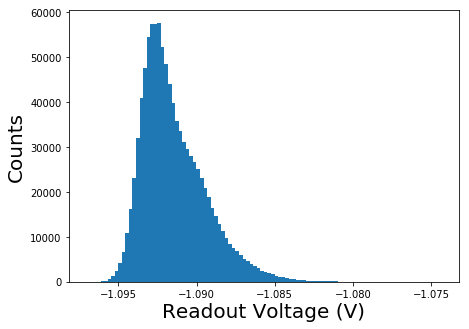

In [137]:
f, axarr = plt.subplots(figsize=(7,5))
axarr.hist(HAADFarray,bins=100)
axarr.set_xlabel('Readout Voltage (V)',fontsize=20)
axarr.set_ylabel('Counts',fontsize=20)

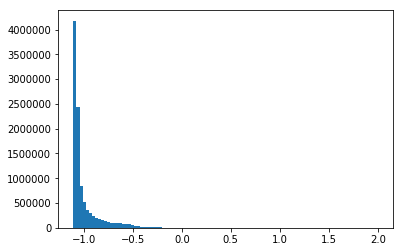

In [125]:
plt.hist(HAADFarray_raw,bins=100)
# plt.xlim([-1.15,-1.05])
plt.show()

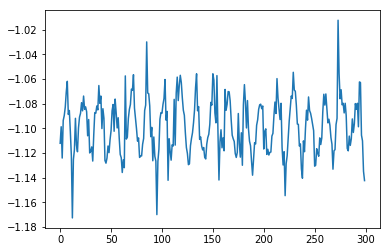

In [26]:
plt.plot(HAADFarray_raw[1200:1500])